In [2]:
import pandas as pd
df = pd.read_csv(r"data\sales.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TransNo      400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
 11  high         400 non-null    object
dtypes: int64(8), object(4)
memory usage: 37.6+ KB


In [4]:
df.isnull().sum()

TransNo        0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
high           0
dtype: int64

---------------------------------------
step (3):

Explanation:

LabelEncoder converts categorical text labels into numeric values.

Example:

ShelveLoc might have values: Good, Medium, Bad
→ Converted to: 2, 1, 0

The same is done for Urban, US, and high (target variable).

After encoding, all columns become numeric — ready for model training.

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"]     = LE.fit_transform(df["Urban"])
df["US"]        = LE.fit_transform(df["US"])
df["high"]      = LE.fit_transform(df["high"])
df.head()

,TransNo,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,0,42,17,1,1,1
1,2,111,48,16,260,83,1,65,10,1,1,1
2,3,113,35,10,269,80,2,59,12,1,1,1
3,4,117,100,4,466,97,2,55,14,1,1,0
4,5,141,64,3,340,128,0,38,13,1,0,0


4. Data Partition (Splitting Features & Target)

Explanation:

Y is the target variable (whether sales are "high" or not).

X contains all other columns (predictor features).

In [6]:
Y = df["high"]
X = df.drop(df[["high"]], axis=1)

5. Splitting Data into Train and Test Sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

6. Building a Decision Tree Model
Explanation:

DecisionTreeClassifier builds a tree structure for classification.

criterion='gini' → Gini Impurity is used to decide how to split the nodes (a measure of purity).

The commented lines show hyperparameter tuning options:

max_depth limits the tree’s depth (controls overfitting)

min_samples_leaf sets minimum samples per leaf node.

In [9]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
#DT = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=1)
#DT = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=3)

7. Training the Model
Explanation:

The model learns patterns from training data.

It splits the data in such a way that it best separates the target classes.

In [10]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

8. Making Predictions
Explanation:

Predicts outcomes for both:

Training set → to check overfitting.

Testing set → to check model’s generalization.

In [11]:
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

9. Evaluating Accuracy
Explanation:

Compares predicted values with actual ones.

accuracy_score = (Correct Predictions / Total Predictions)

In [24]:
from sklearn.metrics import accuracy_score
training_accuracy  = accuracy_score(Y_train, Y_pred_train)
test_accuracy  = accuracy_score(Y_test, Y_pred_test)

In [25]:
import numpy as np
print("training accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))

training accuracy: 1.0
test accuracy: 0.71


11. ShuffleSplit Cross-Validation

ShuffleSplit: Randomly splits the data multiple times (here 200 times).

This helps evaluate how stable and general your model is.

In [26]:
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits = 200, test_size=0.3, random_state=42)

step 12:

cross_validate() trains and tests the model 200 times using different random splits.

Collects both training and testing accuracy for each split.

In [35]:
# Perform cross-validation
cv_results = cross_validate(model, X, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)
# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

In [36]:
print("cross validation: train accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))

cross validation: train accuracy: 0.78
cross validation: test accuracy: 0.7


14. Plotting the Decision Tree

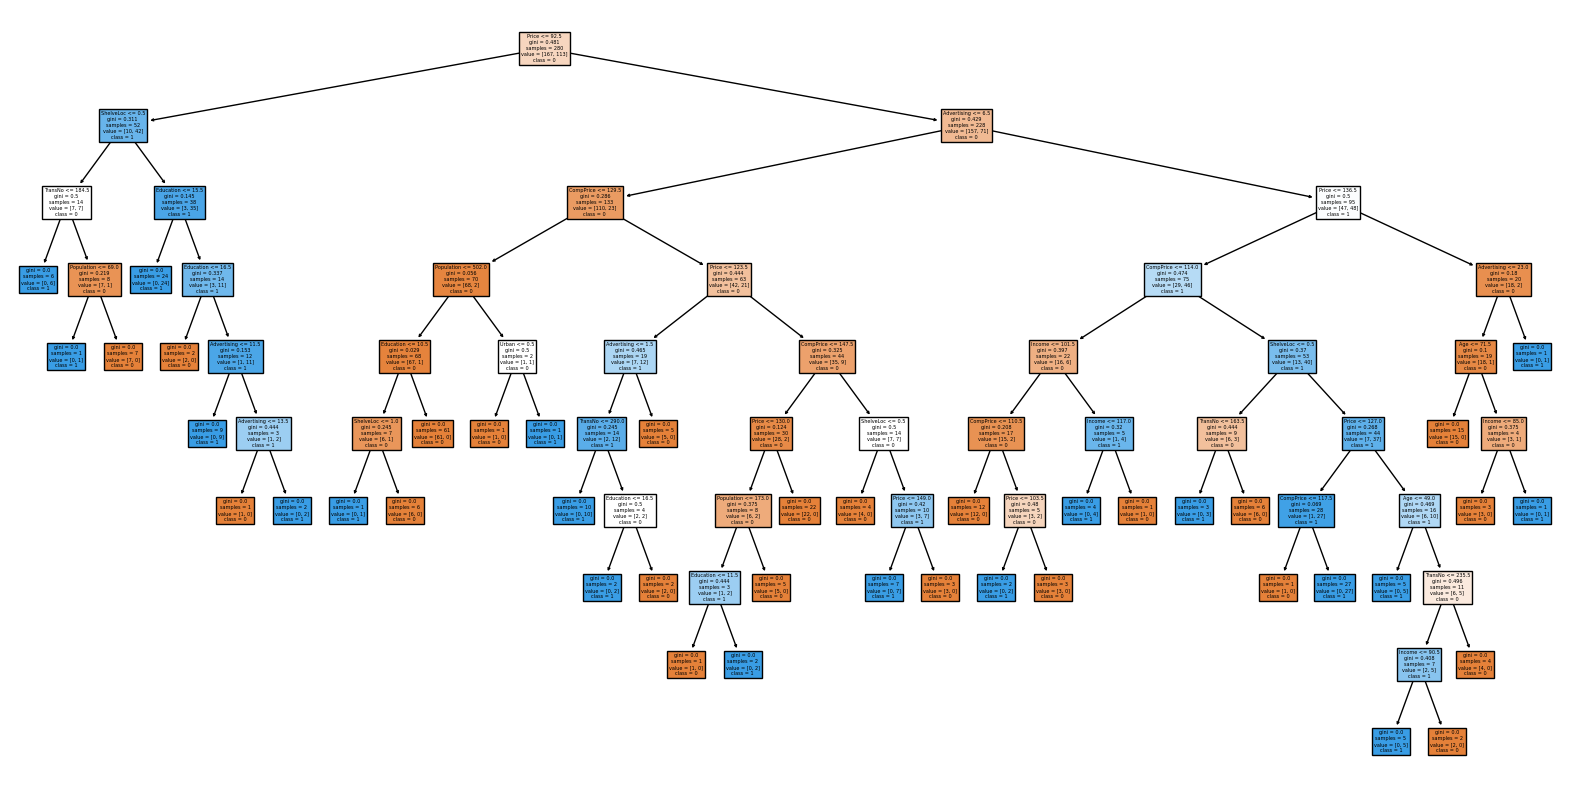

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    DT,
    filled=True,
    feature_names=X.columns.tolist(),
    class_names=['0', '1'],
)
plt.show()

Explanation:

plot_tree() draws the trained decision tree.

filled=True → colors nodes based on class.

feature_names → shows column names used for splitting.

class_names → labels 0 & 1 (like “Low Sales” and “High Sales”).

Summary:


| Step  | Purpose                         | Key Function                               |
| ----- | ------------------------------- | ------------------------------------------ |
| 1-2   | Load and check data             | `read_csv`, `isnull()`                     |
| 3     | Encode categorical columns      | `LabelEncoder`                             |
| 4-5   | Split data                      | `train_test_split`                         |
| 6-9   | Train & test Decision Tree      | `DecisionTreeClassifier`, `accuracy_score` |
| 10-13 | Validate using cross-validation | `ShuffleSplit`, `cross_validate`           |
| 14    | Visualize decision logic        | `plot_tree`                                |
